In [1]:
#Import some packages to use
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

#To see our directory
import os
import random
import gc   #Gabage collector for cleaning deleted data from memory

In [2]:
os.getcwd()

'/home/arstan/Desktop/Computer_Vision/Python/food-recognizer'

In [3]:
image = cv2.imread("./training_images/plov/0.jpg")

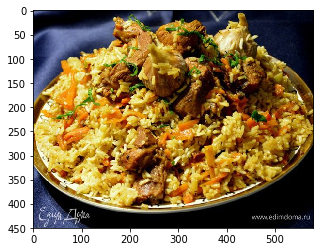

In [4]:
# parse BRG to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show image
plt.imshow(image)

In [5]:
class_names = ['PLOV', 'LAGMAN', 'MANTY']

In [6]:
# assign path for each folder with food

plov_images_path = "./training_images/plov/"
lagman_images_path = "./training_images/lagman/"
manty_images_path = "./training_images/manty/"

In [7]:
# get full relative path for filenames

plov_filenames = [plov_images_path + x for x in os.listdir(plov_images_path)]
lagman_filenames = [lagman_images_path + x for x in os.listdir(lagman_images_path)]
manty_filenames = [manty_images_path + x for x in os.listdir(manty_images_path)]

In [8]:
# get all filenames in one list

train_imgs = plov_filenames + lagman_filenames + manty_filenames

In [9]:
random.shuffle(train_imgs)  # shuffle it randomly

In [10]:
from keras.utils import to_categorical

print(to_categorical(0, num_classes=3))

Using TensorFlow backend.


[1. 0. 0.]


In [11]:
#Lets declare our image dimensions
#we are using coloured images. 

nrows = 150
ncolumns = 150
channels = 1  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image_path in list_of_images:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        X.append(cv2.resize(image, (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
#         if 'plov' in image:
#             y.append([1, 0, 0])
#         elif 'lagman' in image:
#             y.append([0, 1, 0])
#         elif 'manty' in image:
#             y.append([0, 0, 1])

        if 'plov' in image_path:
            y.append(to_categorical(0, num_classes=len(class_names)))
        elif 'lagman' in image_path:
            y.append(to_categorical(1, num_classes=len(class_names)))
        elif 'manty' in image_path:
            y.append(to_categorical(2, num_classes=len(class_names)))
    
    return X, y

In [12]:
#get the train and label data
X, y = read_and_process_image(train_imgs)

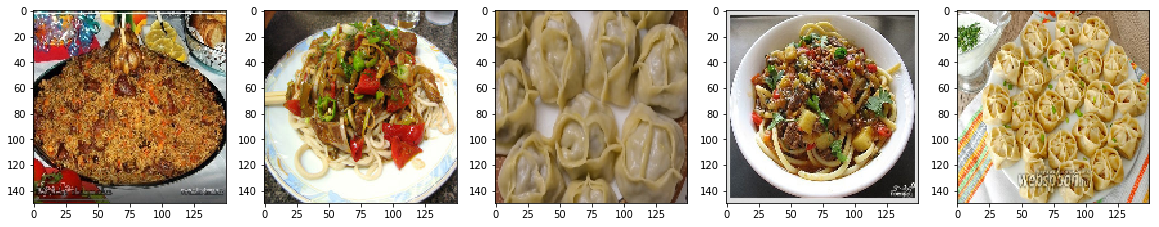

In [13]:
#Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

In [14]:
#Convert list to numpy array
X = np.array(X)
y = np.array(y)
X.shape

(63, 150, 150, 3)

In [15]:
y.shape

(63, 3)

In [16]:
X = X / 255.

In [17]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (63, 150, 150, 3)
Shape of labels is: (63, 3)


In [18]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [21]:
epochs = 20

In [22]:
model.fit(X, y, epochs=epochs)

Epoch 1/20
63/63 [==============================] - 2s 34ms/step - loss: 1.3049 - acc: 0.2857
Epoch 2/20
63/63 [==============================] - 2s 25ms/step - loss: 1.1227 - acc: 0.3333
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 1.0799 - acc: 0.3651
Epoch 4/20
63/63 [==============================] - 2s 25ms/step - loss: 1.0376 - acc: 0.4603
Epoch 5/20
63/63 [==============================] - 2s 25ms/step - loss: 0.9062 - acc: 0.7143
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 0.8556 - acc: 0.6032
Epoch 7/20
63/63 [==============================] - 2s 27ms/step - loss: 0.7597 - acc: 0.6349
Epoch 8/20
63/63 [==============================] - 2s 26ms/step - loss: 0.6141 - acc: 0.8095
Epoch 9/20
63/63 [==============================] - 2s 25ms/step - loss: 0.5297 - acc: 0.8571
Epoch 10/20
63/63 [==============================] - 2s 26ms/step - loss: 0.5325 - acc: 0.7937
Epoch 11/20
63/63 [==============================] - 2s 26m

In [23]:
model.save('food_cnn_model.h5')

In [24]:
model.save_weights('food_cnn_model_weghts.h5')

In [39]:
test_image = cv2.imread("test_image.jpg")
# parse BRG to RGB
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

In [40]:
test_image = cv2.resize(test_image, (nrows,ncolumns), interpolation=cv2.INTER_CUBIC)
test_image.shape

(150, 150, 3)

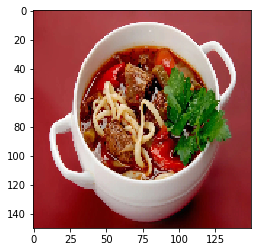

In [41]:
# show image
plt.imshow(test_image)

In [42]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 150, 150, 3)

In [43]:
predictions = model.predict(test_image)
np.set_printoptions(suppress=True)

print(predictions)

[[0. 1. 0.]]


In [44]:
prediction_num = np.argmax(predictions)

In [45]:
print("Model predicted: %s" % class_names[prediction_num])

Model predicted: LAGMAN
